In [1]:
import matplotlib.pyplot as plt
from scipy import signal
import sympy as sp
import numpy as np
import math
import cmath
%run 'shared_functions.ipynb'

# 2.1
A Chebyshev prototype filter is (usually) normalized to a ripple bandwidth of 1 rad/s.

## a.Show that the 3 dB bandwidth can be found as:

$$
\omega_{3dB} = \cosh{\left(\frac{1}{n} \cosh^{-1}{\frac{1}{\epsilon}}\right)}
$$

### Hints
- (1) $\epsilon^2C_2^2(\omega_{3dB}) = 1$
- (2) $C_n(\omega) = \cosh{(n \cdot \cosh^{-1}{(\omega)})}$ for $\omega > 1$

We can rewrite (1) as $C_2(\omega_{3dB}) = \frac{1}{\epsilon}$, and then set it equas to (2)

$$
\begin{align}
\cosh{(n \cdot \cosh^{-1}{(\omega)})} &= \frac{1}{\epsilon} \\
n \cdot \cosh^{-1}{(\omega)} &= \cosh^{-1}{(\frac{1}{\epsilon})} \\
\cosh^{-1}{(\omega)} &= \frac{1}{n}\cosh^{-1}{(\frac{1}{\epsilon})} \\
\omega &= \cosh{(\frac{1}{n}\cosh^{-1}{(\frac{1}{\epsilon})})} \\
\end{align}
$$

## b.Find the 3-dB bandwidth for a 4thorder filter with a 0.5 dB ripple bandwidth of 1 rad/s.

From MM2.S15, we get $\epsilon = \sqrt{10^{\text{Ripple}_{\text{dB}}/10}-1}$, which we can put into our equation.

In [2]:
n = 4
ep = math.sqrt(10**(0.5/10)-1)

w_3db = math.cosh((1/n)*math.acosh(1/ep))

n, ep, w_3db

(4, 0.34931140018894796, 1.0931019418172028)

# 2.2
The requirements for a Chebyshev low-pass filter are:

- Passband ripple: 0.5 dB
- Ripple bandwidth: 20 kHz
- The attenuation at 190 kHz shall be at least 30 dB

## a.Find the frequency scaling factor, $k_f$, and the necessary filter order

I really need to clear up, why it is like so before I can finish this exercise 

# 2.3
A low-pass prototype filter has the transfer function shown.

$$
H_{\text{LPP}}(s) = \frac{0.423}{(s+0.446)(s^2+0.446s+0.949)}
$$


## a. Find the locati on of the poles

$s+0.446 = 0 \leftrightarrow s = -0.446$

For the last, we do need to do the quadratic equation.

$$
\begin{align}
x &= \frac{-b \pm \sqrt{b^2-4ac}}{2a} \\
&= \frac{-0.446 \pm \sqrt{0.446^2-4\cdot 1 \cdot 0.949}}{2 \cdot 1} \\
\end{align}
$$

In [3]:
a = 1
b = 0.446
c = 0.949

for pm in [-1, 1]:
    display((-b + pm*cmath.sqrt(b**2-4*a*c))/(2*a))

(-0.223-0.9482990034793878j)

(-0.223+0.9482990034793878j)

We can also do this without any hand calculations at all, and just use python for it all.
Should work for any expression that we might have.

In [6]:
# transfer function parts
s = sp.symbols("s")
num = 0.423
den = (s+0.446)*(s**2+0.446*s+0.949)

# expand expressions
# den_expanded = sp.expand(den)
den_coeffs = sp.Poly(den, s).coeffs()
den_coeffs = np.array(den_coeffs, dtype=float)

# num_expanded = sp.expand(num)
num_coeffs = sp.Poly(num, s).coeffs()
num_coeffs = np.array(num_coeffs, dtype=float)

tf = signal.TransferFunction(num_coeffs, den_coeffs)
zpk = tf.to_zpk()

print("Gain: ", zpk.gain)
print("Zeros: ", zpk.zeros)
print("Poles: ", zpk.poles)

Gain:  0.423
Zeros:  []
Poles:  [-0.223+0.948299j -0.223-0.948299j -0.446+0.j      ]


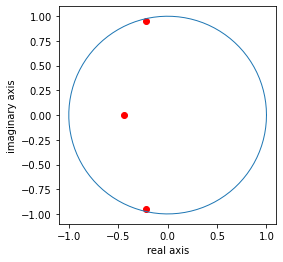

In [7]:
plotPoles(zpk.poles)